## Import Libraries and Files 

In [28]:
# Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Import Files
bike = pd.read_pickle(r'../Data/Prepared/bike_final.pkl')

In [30]:
bike.shape

(988851, 15)

## Visualisations

##### Average Temperature

In [31]:
# Sate date as Index
bike = bike.set_index('date')

In [32]:
# Sort Index
bike = bike.sort_index()

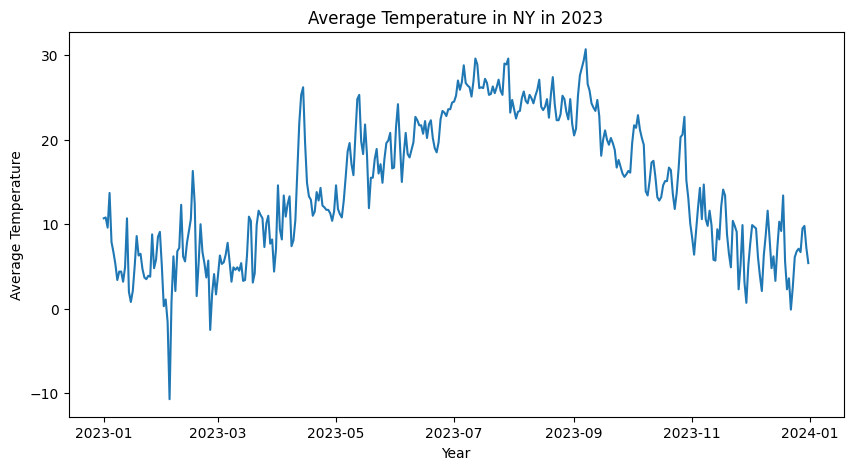

In [6]:
# Plot avg temperature 
plt.figure(figsize=(10,5)) #Set figure
plt.plot(bike['avg_temp'])
# Set title and labels
plt.title('Average Temperature in NY in 2023')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
# Show plot
plt.show()

##### Trips per Day

In [33]:
# Count of trips per day
bike['trips_per_day'] = bike.groupby('date').agg({'ride_id':['count']})

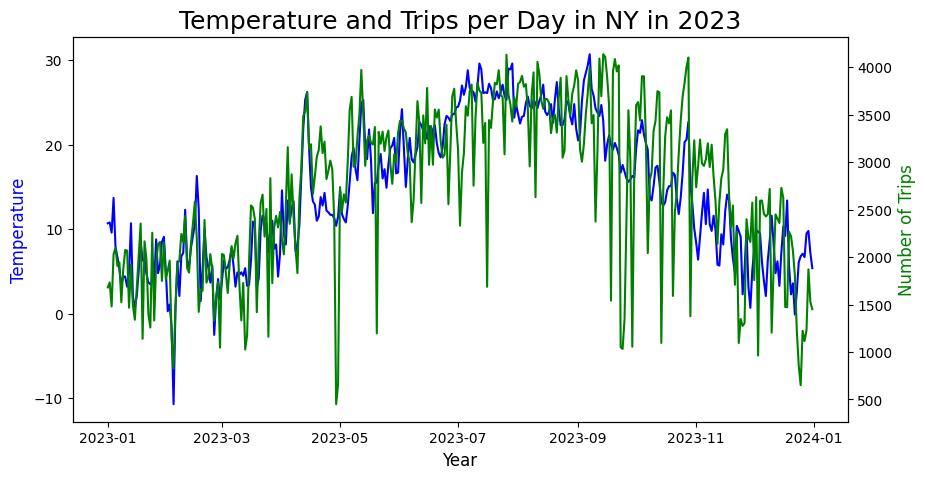

In [8]:
# Plot temperature and trips per day on dual axis
# Create figure and axes
fig, ax = plt.subplots(figsize=(10,5))
# Make plot of temperature
ax.plot(bike['avg_temp'], color='blue')
ax.set_xlabel('Year', fontsize=12) # Set x label
ax.set_ylabel('Temperature', color='blue', fontsize=12) # Set y label
# Make plot of trips per day
ax2 = ax.twinx()
ax2.plot(bike['trips_per_day'], color='green')
ax2.set_xlabel('Year', fontsize=12) # Set x label
ax2.set_ylabel('Number of Trips', color='green', fontsize=12) # Set y label
# Set title
plt.title('Temperature and Trips per Day in NY in 2023', fontsize=18)
# Show plot
plt.show()

Given the complexity of the graph, I preferred to use an object-oriented approach, so that both axes of temperature and number of trips made to NY in 2022 could be displayed on a single graph

##### Trip Duration

In [34]:
# Convert to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [35]:
# Calculate trip duration
bike['trip_duration'] = bike['end_time'] - bike['start_time']

In [36]:
# Calculate trip duration in minutes
bike['trip_mins'] = bike['trip_duration'].dt.total_seconds() / 60

In [37]:
bike['trip_mins'].describe()

count    988851.000000
mean         12.492830
std          69.936324
min         -57.716667
25%           4.066667
50%           6.300000
75%          10.183333
max       17112.150000
Name: trip_mins, dtype: float64

In [38]:
# Flag trip duration
bike.loc[bike['trip_mins'] <= 0, 'trip_leng'] = 'No Trip'
bike.loc[(bike['trip_mins'] >0 ) & (bike['trip_mins'] <160) , 'trip_leng'] = 'Standard Usage'
bike.loc[bike['trip_mins'] >=160, 'trip_leng'] = 'Atypical Usage'

In [39]:
bike['trip_leng'].value_counts()

trip_leng
Standard Usage    984978
Atypical Usage      3819
No Trip               54
Name: count, dtype: int64

In [40]:
# Check the values with no trips
bike2 = bike[bike['trip_leng'] == 'No Trip']

In [41]:
# List for printing
to_p = ['start_time', 'end_time', 'trip_leng', 'trip_mins']

In [50]:
t_p = bike2[to_p]

In [42]:
# Check shape of bike2 (No trip values)
bike2.shape

(54, 18)

In [43]:
# Exclude no trip values
bike = bike[bike['trip_leng'] != 'No Trip']

In [44]:
# Check shape of bike
bike.shape

(988797, 18)

In [45]:
# Group data top plot
usage = bike.groupby('trip_leng')['ride_id'].nunique().reset_index()

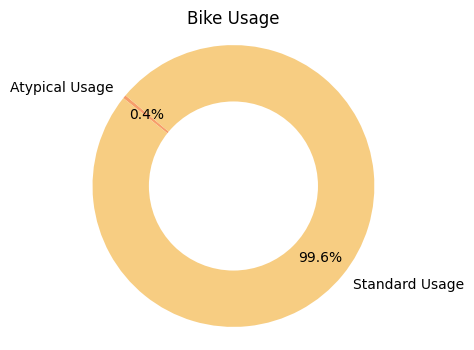

In [46]:
# Plot bike usage
# Create figure
plt.figure(figsize=(4,4))
# Plot Pie
plt.pie(usage['ride_id'],
        labels=usage['trip_leng'],
        colors=['#F79E6B', '#F7CD82'],
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.80,
        wedgeprops=dict(width=0.5))
# Plot Circle
centre_circle = plt.Circle((0,0), 0.60, fc='White')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Bike Usage')
# Show Plot
plt.show()


In [48]:
# Select only Standard Usage for plotting
day_trip = bike[bike['trip_leng'] != 'Atypical Usage']

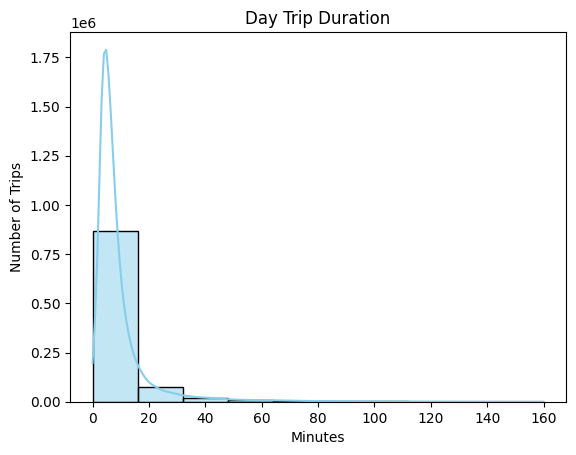

In [49]:
# Make plot of duration of day trips
sns.histplot(day_trip['trip_mins'], bins=10, kde=True, color='skyblue')
plt.title('Day Trip Duration')
plt.xlabel('Minutes')
plt.ylabel('Number of Trips')
plt.show()

## Save File

In [50]:
bike = bike.reset_index()

In [51]:
# Save File
bike.to_pickle(r'../Data/Prepared/bike_flag.pkl')